In [1]:
%%capture
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [2]:
!pip install torchinfo
!pip install super_gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 66.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to

In [3]:
from super_gradients.training import models

[2023-12-02 02:00:00] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-12-02 02:00:00] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-02 02:00:00] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-12-02 02:00:07] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-02 02:00:07] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-02 02:00:07] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-02 02:00:07] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-12-02 02:00:07] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-12-02 02:00:07] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-12-02 02:00:07] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2023-12-02 02:00:07] WARNING - env_sanity_check.py - Failed to verify i

In [8]:
from torchinfo import summary

In [5]:
yolo_nas = models.get("yolo_nas_l",pretrained_weights = "coco")

[2023-12-02 02:00:09] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:17<00:00, 15.5MB/s]
[2023-12-02 02:00:28] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [6]:
"""x s m l"""

'x s m l'

In [9]:
summary(model = yolo_nas,
        input_size = (16,3,640,640),
        col_names = ["input_size","output_size","num_params","trainable"],
        col_width = 20,
        row_settings = ["var_names"])

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

# Pass the Images to get Prediction

[2023-12-02 02:05:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


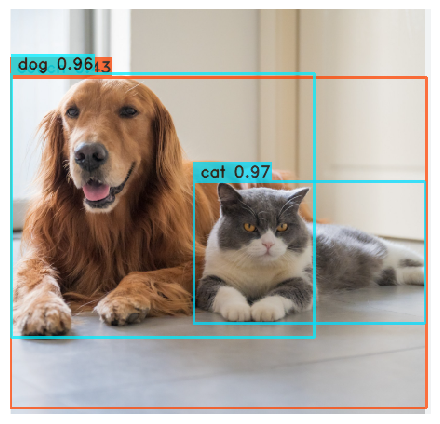

In [10]:
url = "/content/cat_dog.png"
yolo_nas.predict(url,conf = 0.25).show()

[2023-12-02 02:11:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


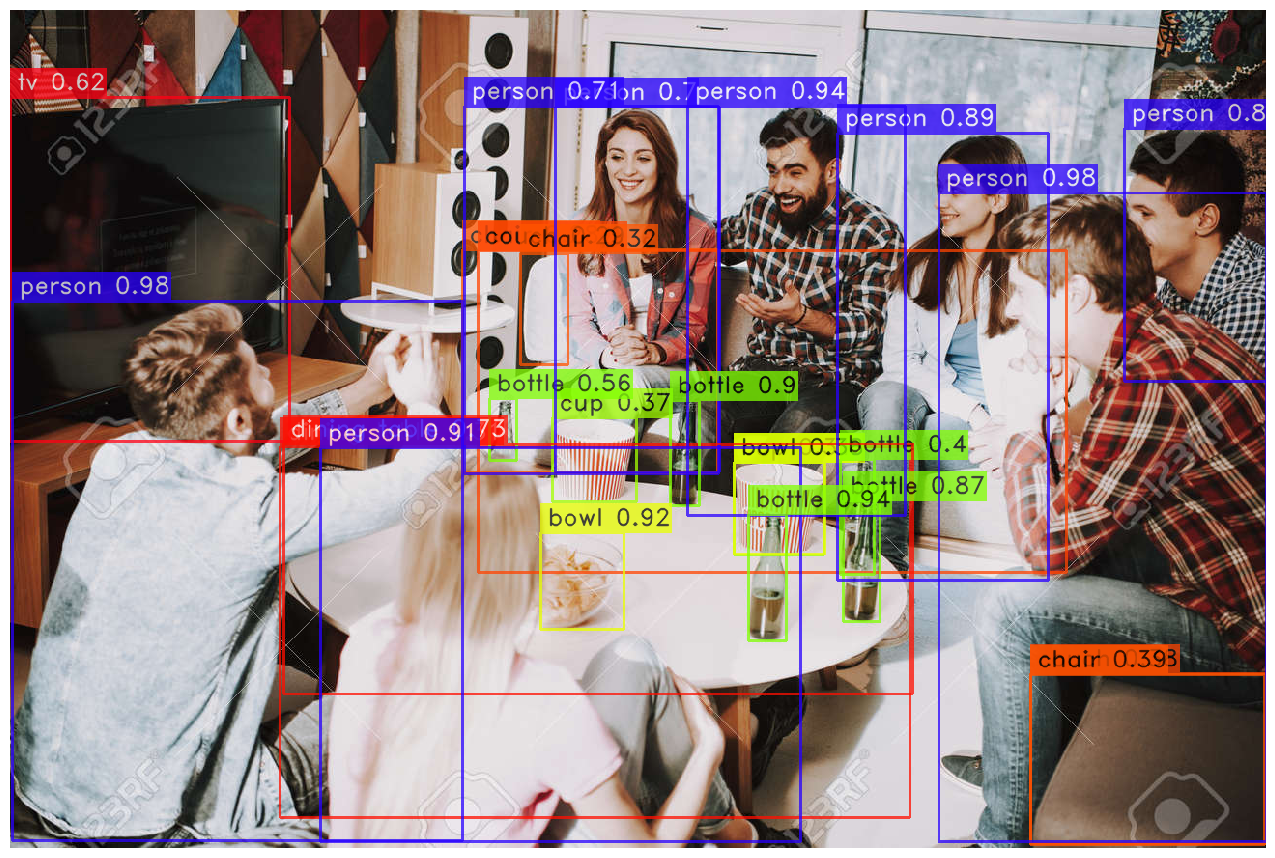

In [14]:
url = "/content/group.jpg"
yolo_nas.predict(url,conf= 0.25).show()

In [15]:
url = "/content/generation.jpg"
yolo_nas.predict(url,conf=0.25).show()

Output hidden; open in https://colab.research.google.com to view.

[2023-12-02 02:17:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


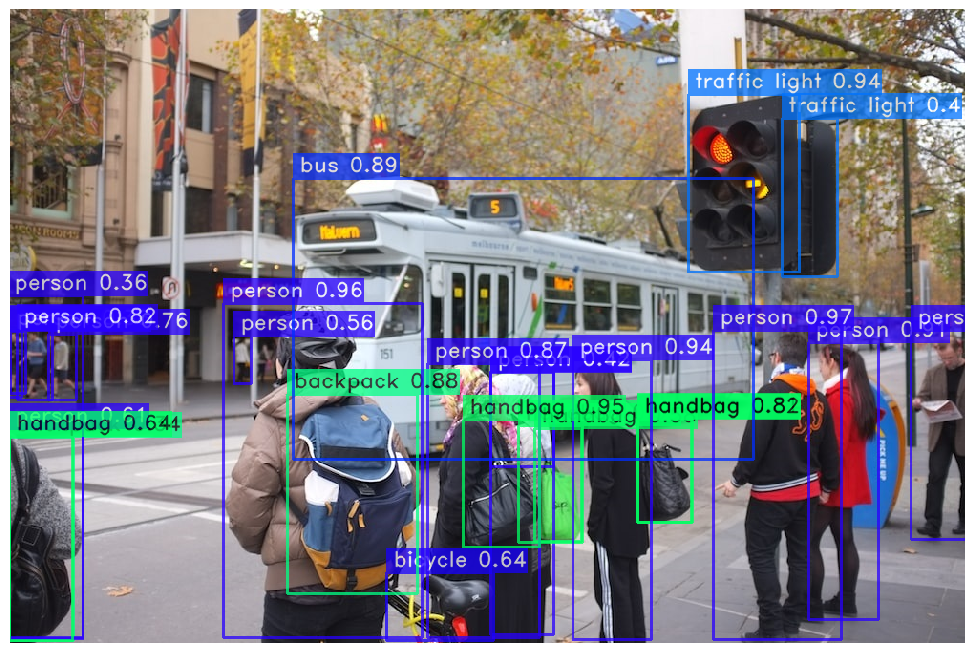

In [16]:
url = "/content/signal.jpg"
yolo_nas.predict(url,conf = 0.25).show()

In [18]:
input_video_path = "/content/roadways.mp4"
output_video_path = "/content/roadways_detection.mp4"

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

yolo_nas.to(device).predict(input_video_path).save(output_video_path)

Processing Video: 100%|█████████▉| 1309/1314 [01:10<00:00, 30.44it/s]

In [19]:
input_video_path = "/content/testwalk.mp4"
output_video_path = "/content/testwalk_detection.mp4"

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

yolo_nas.to(device).predict(input_video_path).save(output_video_path)

Processing Video: 100%|█████████▉| 340/341 [01:06<00:00,  6.56it/s]

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')